# Titanic Dataset

### Data Dictionary

| Variable   | Definition                            | Key                            |
|------------|---------------------------------------|--------------------------------|
| survival   | Survival                              | 0 = No, 1 = Yes                |
| pclass     | Ticket class                          | 1 = 1st, 2 = 2nd, 3 = 3rd      |
| sex        | Sex                                   |                                |
| Age        | Age in years                          |                                |
| sibsp      | # of siblings/spouses aboard Titanic  |                                |
| parch      | # of parents/children aboard Titanic  |                                |
| ticket     | Ticket number                         |                                |
| fare       | Passenger fare                        |                                |
| cabin      | Cabin number                          |                                |
| embarked   | Port of Embarkation                   | C = Cherbourg, Q = Queenstown, S = Southampton |


# 1. Problem Definition

### Use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.
### Specific Task: find patterns in train.csv that help predict whether the passengers in test.csv survived.

# 2. Data Collection and Exploration

In [320]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# models and algorithms
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Step 1: Load the Dataset
train_df = pd.read_csv('data/train/train.csv')
test_df = pd.read_csv('data/test/test.csv')
combine_df = [train_df, test_df]


In [321]:
# Features
print(f"Features:\n{train_df.columns.values}")
print()

# Display first few rows of train and test data
train_df.head()
test_df.head()

# Summary statistics
print(train_df.describe())
print(test_df.describe())

# Check for missing values
print(train_df.isnull().sum())
print(test_df.isnull().sum())


Features:
['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.0000

### Embarked Analysis

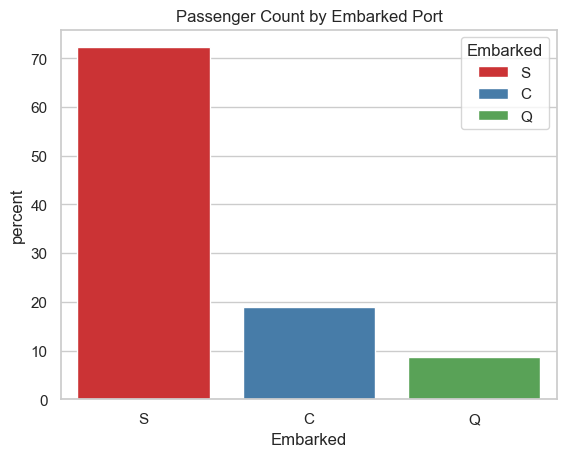

In [322]:
x = 'hue'
sns.countplot(x='Embarked', hue='Embarked', data=train_df, palette="Set1", legend=True, stat='percent')
plt.title("Passenger Count by Embarked Port")
plt.show()


#### Survival by Embarkation Port: 
- Passengers from Cherbourg had a 55% survival rate, significantly higher than those from Southampton (34%) and Queenstown (39%).

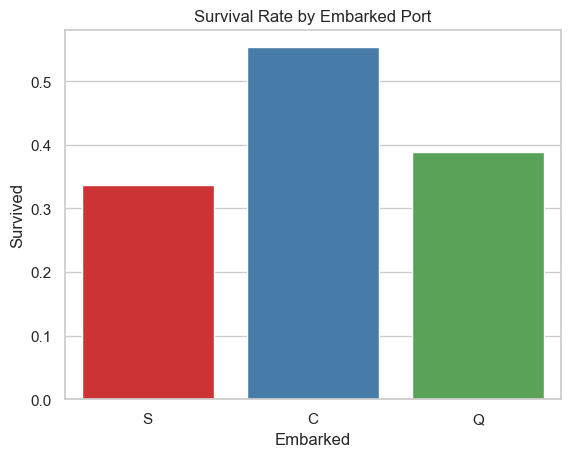

In [323]:
# Updated visualization for Survival by Embarkation Port
sns.barplot(x='Embarked', y='Survived', hue='Embarked', data=train_df, errorbar=None, palette="Set1", legend=False)
plt.title("Survival Rate by Embarked Port")
plt.show()


#### Interpretation: 
- This initial finding is somewhat counter-intuitive, as one might expect Southampton to have a higher survival rate due to the larger number of passengers. However, upon further analysis, we found that Cherbourg had a higher proportion of first-class passengers, which likely drove the higher survival rate.


### Visualize Survival Rates by Gender

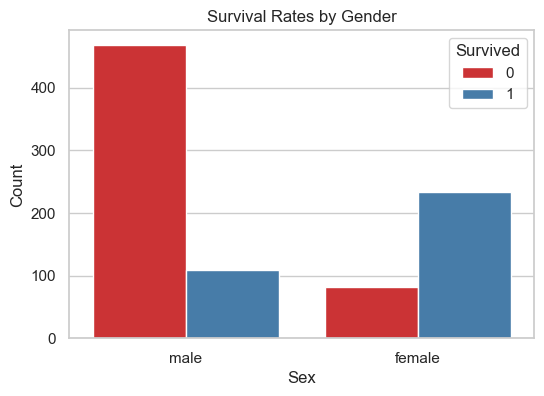

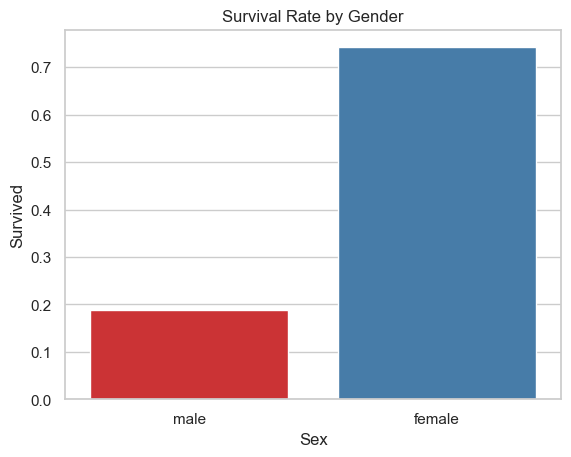

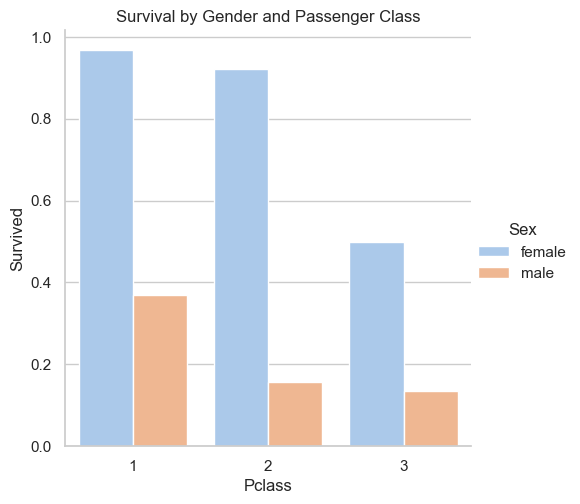

In [324]:
sns.set_theme(style="whitegrid")

# Plot survival rates by gender
plt.figure(figsize=(6, 4))
sns.countplot(x='Sex', hue='Survived', data=train_df, palette='Set1')
plt.title("Survival Rates by Gender")
plt.ylabel("Count")
plt.show()

# Updated visualization for Survival Rate by Gender
sns.barplot(x='Sex', y='Survived', hue='Sex', data=train_df, errorbar=None, palette="Set1", legend=False)
plt.title("Survival Rate by Gender")
plt.show()

# Updated visualization for Survival by Gender and Passenger Class
sns.catplot(x="Pclass", y="Survived", hue="Sex", data=train_df, kind="bar", palette="pastel", errorbar=None)
plt.title("Survival by Gender and Passenger Class")
plt.show()


### Visualize Survival Rates by Passenger Class

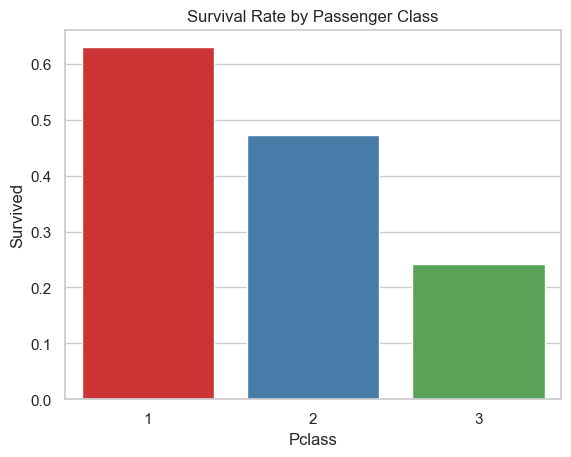

In [325]:
# Plot survival rates by passenger class
# plt.figure(figsize=(6, 4))
# sns.countplot(x='Pclass', hue='Survived', data=train_df, palette='Set1', legend=True, stat='percent')
# plt.title("Survival Rates by Passenger Class")
# plt.ylabel("Count")
# plt.show()

# Updated visualization for Survival by Passenger Class
sns.barplot(x='Pclass', y='Survived', hue='Pclass', data=train_df, errorbar=None, palette="Set1", legend=False)
plt.title("Survival Rate by Passenger Class")
plt.show()

plt.show()

#### Survival by Class: 
- There is a clear relationship between class and survival, with first-class passengers having the highest survival rate at 63%, followed by 2nd class (47%) and 3rd class (24%).

### Survival by Gender: 
- Women had a much higher survival rate (74%) compared to men (19%).
- The "women and children first" policy is clearly reflected in the survival rates. Nearly all first-class women survived, but survival for third-class women was much lower. Men in lower classes had the worst chances of survival.

### Visualize Survival Rates by Age

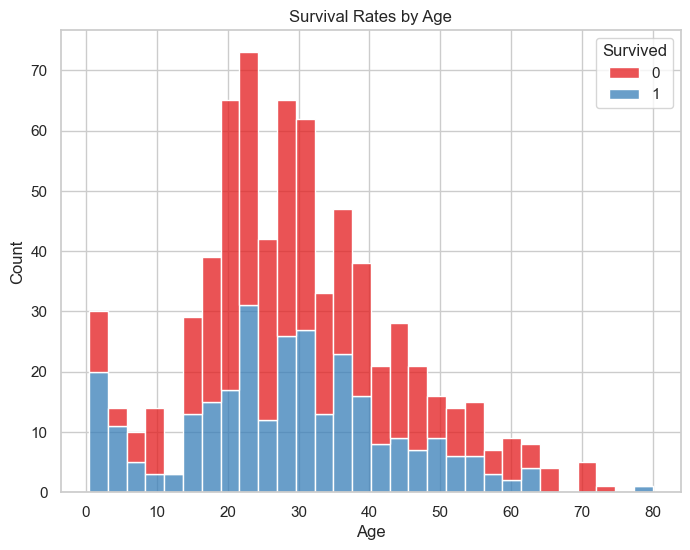

In [326]:
# Create a plot that shows survival based on age
plt.figure(figsize=(8, 6))
sns.histplot(data=train_df, x='Age', hue='Survived', multiple='stack', bins=30, palette='Set1')
plt.title("Survival Rates by Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


#### Survival by Age: 
- Younger passengers had a much higher survival rate, particularly children under 10 years old. Passengers over 70 had almost no chance of survival.

### Visualize Age Distribution of Passengers

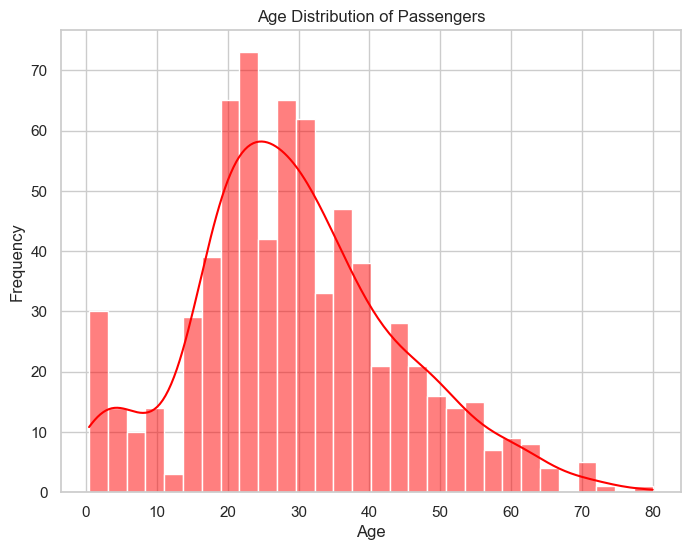

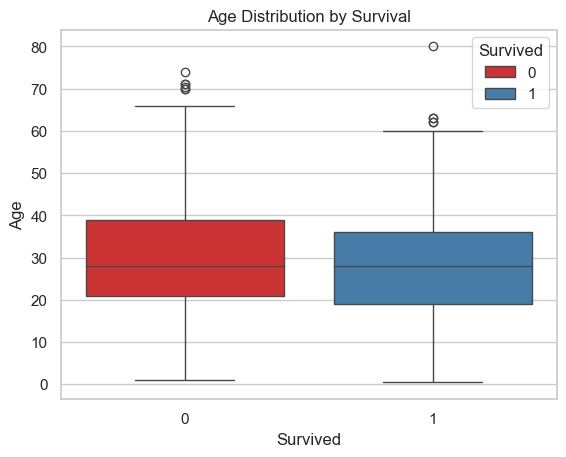

In [327]:
# Plot the distribution of age
plt.figure(figsize=(8, 6))
sns.histplot(train_df['Age'].dropna(), bins=30, kde=True, color='red')
plt.title("Age Distribution of Passengers")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# Updated visualization for Age Distribution by Survival
sns.boxplot(x='Survived', y='Age', hue='Survived', data=train_df, palette="Set1")
plt.title("Age Distribution by Survival")
plt.show()


#### The significantly higher survival rate for children supports the historical "women and children first" evacuation policy. Passengers over 70 faced slim chances of survival, likely due to limited mobility and other late-age factors.

In [328]:
# Display descriptive statistics for survived vs non-survived passengers
train_df.groupby('Survived')['Age'].describe()


,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,424.0,30.626179,14.172110,1.00,21.0,28.0,39.0,74.0
1,290.0,28.343690,14.950952,0.42,19.0,28.0,36.0,80.0


- The average age of passengers who survived was 28.3 years, while for those who did not survive, it was 30.6 years.
- Median ages for both groups were close, but the distribution of age for survivors was slightly more skewed towards younger passengers.

- Younger passengers, particularly children under 10, had a much higher chance of survival, reinforcing the "women and children first" policy. The difference in median ages between survivors and non-survivors is not large, but younger age clearly played a role in survivability.

# 3. Feature Engineering

In [329]:
# Preprocessing function to handle missing values, encoding, and scaling
def preprocess_data(df):
    # Fill missing age values with the median
    df['Age'] = df['Age'].fillna(df['Age'].median())

    # Fill missing embarked values with the most common value
    df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

    # Fill missing fare values with the median (important for test data)
    df['Fare'] = df['Fare'].fillna(df['Fare'].median())

    # Create a new feature 'CabinAvailable' to indicate whether cabin info is available
    df['CabinAvailable'] = df['Cabin'].apply(lambda x: 0 if pd.isna(x) else 1)

    # Family Size: Combine SibSp and Parch into a single feature, FamilySize
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

    # Extract title from the Name column (e.g., Mr., Mrs., Miss)
    df['Title'] = df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

    # Drop unnecessary columns ('Name', 'Ticket', 'Cabin', 'PassengerId')
    columns_to_drop = ['Name', 'Ticket', 'Cabin', 'PassengerId']
    df = df.drop(columns_to_drop, axis=1, errors='ignore')

    # Encode categorical variables (Sex, Embarked, Title)
    df = pd.get_dummies(df, columns=['Sex', 'Embarked', 'Title'], drop_first=True)

    # Scale continuous variables (Fare and Age)
    scaler = StandardScaler()
    df[['Fare', 'Age']] = scaler.fit_transform(df[['Fare', 'Age']])
    
    return df

# Load the train and test datasets
train_df = pd.read_csv('data/train/train.csv')
test_df = pd.read_csv('data/test/test.csv')

# Step 2: Store PassengerId from test_df before preprocessing
passenger_id_test = test_df['PassengerId'].copy()

# Apply preprocessing to both train and test datasets
train_df = preprocess_data(train_df)
test_df = preprocess_data(test_df)

# Step 3: Define features and target variable for training
X_train = train_df.drop('Survived', axis=1)
y_train = train_df['Survived']

# Align test set with the training set columns
train_columns = X_train.columns
X_test = test_df.copy()

# Add missing columns in the test set
for col in train_columns:
    if col not in X_test.columns:
        X_test[col] = 0

# Ensure test set has the same columns as the train set
X_test = X_test[train_columns]


# Step 4: Model Building

In [330]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Select and Initialize models
logreg = LogisticRegression(max_iter=1000)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
svm_model = SVC()

# Step 4: Cross-validate Logistic Regression
cv_scores_logreg = cross_val_score(logreg, X_train, y_train, cv=5, scoring='accuracy')
logreg_accuracy = cv_scores_logreg.mean()

# Step 5: Cross-validate Random Forest
cv_scores_rf = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')
rf_accuracy = cv_scores_rf.mean()

# Step 6: Cross-validate SVM
cv_scores_svm = cross_val_score(svm_model, X_train, y_train, cv=5, scoring='accuracy')
svm_accuracy = cv_scores_svm.mean()

# Output cross-validation accuracies
print(f"Logistic Regression Cross-Validation Accuracy: {logreg_accuracy:.4f}")
print(f"Random Forest Cross-Validation Accuracy: {rf_accuracy:.4f}")
print(f"SVM Cross-Validation Accuracy: {svm_accuracy:.4f}")


Logistic Regression Cross-Validation Accuracy: 0.8305
Random Forest Cross-Validation Accuracy: 0.8047
SVM Cross-Validation Accuracy: 0.8316


### Hyperparameter Tuning

In [331]:
from sklearn.model_selection import GridSearchCV
# Step 1: Define parameter grids for each model

# Logistic Regression parameters
param_grid_logreg = {
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs']
}

# Random Forest parameters
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# SVM parameters
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Step 2: Hyperparameter tuning with GridSearchCV

# Logistic Regression tuning
grid_search_logreg = GridSearchCV(LogisticRegression(max_iter=1000), param_grid_logreg, cv=5, scoring='accuracy')
grid_search_logreg.fit(X_train, y_train)

# Random Forest tuning
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

# SVM tuning
grid_search_svm = GridSearchCV(SVC(), param_grid_svm, cv=5, scoring='accuracy')
grid_search_svm.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy')

# 5. Model Evaluation - Precision, Cross Validation

In [332]:
# Step 3: Display the best parameters and cross-validation score for each model
print("Best parameters for Logistic Regression:", grid_search_logreg.best_params_)
print(f"Best cross-validation accuracy for Logistic Regression: {grid_search_logreg.best_score_:.4f}")

print("Best parameters for Random Forest:", grid_search_rf.best_params_)
print(f"Best cross-validation accuracy for Random Forest: {grid_search_rf.best_score_:.4f}")

print("Best parameters for SVM:", grid_search_svm.best_params_)
print(f"Best cross-validation accuracy for SVM: {grid_search_svm.best_score_:.4f}")

Best parameters for Logistic Regression: {'C': 1, 'solver': 'lbfgs'}
Best cross-validation accuracy for Logistic Regression: 0.8305
Best parameters for Random Forest: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 200}
Best cross-validation accuracy for Random Forest: 0.8294
Best parameters for SVM: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Best cross-validation accuracy for SVM: 0.8361


# 6. Generate Predictions Using the Best SVM Model

In [333]:
# Select best model
best_model = grid_search_svm.best_estimator_

# Make predictions on the test set using the best model
y_pred_final = best_model.predict(X_test)

# 7. Prepare Submission Dataframe

In [334]:
# Prepare the submission dataframe
submission = pd.DataFrame({
    "PassengerId": passenger_id_test,  # Use the PassengerId saved earlier
    "Survived": y_pred_final           # Predictions from the best model
})

# Save the submission to a CSV file
submission.to_csv('titanic_submission.csv', index=False)

print("Submission file 'titanic_submission.csv' generated successfully.")

Submission file 'titanic_submission.csv' generated successfully.
